In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import datetime  

# Load the dataset

In [2]:
file_path = "Walmart.csv"
df = pd.read_csv(file_path)

# Convert transaction_date to datetime format

In [3]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"], errors='coerce')

# Extract features from transaction_date

In [4]:

df["transaction_year"] = df["transaction_date"].dt.year
df["transaction_month"] = df["transaction_date"].dt.month
df["transaction_day"] = df["transaction_date"].dt.day
df["transaction_hour"] = df["transaction_date"].dt.hour

# Drop original date column if not needed

In [5]:
df.drop(columns=["transaction_date"], inplace=True)

# Compute total sales revenue

In [6]:
df["total_sales"] = df["quantity_sold"] * df["unit_price"]

# Handle missing values by filling with appropriate strategies

In [7]:

df.fillna({
    "unit_price": df["unit_price"].median(),
    "total_sales": 0,
    "forecasted_demand": df["forecasted_demand"].median(),
    "actual_demand": df["actual_demand"].median()
}, inplace=True)

# Convert boolean columns to integers (0/1)

In [8]:

bool_cols = ["promotion_applied", "holiday_indicator", "stockout_indicator"]
df[bool_cols] = df[bool_cols].astype(int)

# Remove duplicates

In [9]:

df.drop_duplicates(inplace=True)


# Outlier detection and removal using Z-score

In [10]:
def remove_outliers(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores < threshold]


# Apply outlier removal to key numerical columns

In [11]:

df = remove_outliers(df, "total_sales")
df = remove_outliers(df, "unit_price")


# Normalize numerical features

In [12]:

num_cols = ["unit_price", "quantity_sold", "total_sales", "forecasted_demand", "actual_demand"]
df[num_cols] = (df[num_cols] - df[num_cols].min()) / (df[num_cols].max() - df[num_cols].min())


In [13]:
df['promotion_type']

0                       NaN
1       Percentage Discount
2                       NaN
3       Percentage Discount
4                       NaN
               ...         
4995                    NaN
4996                    NaN
4997                    NaN
4998                    NaN
4999                   BOGO
Name: promotion_type, Length: 5000, dtype: object

In [14]:
df['promotion_type'].fillna("No Promotion", inplace=True)

In [15]:
print(df['promotion_type'].unique())

['No Promotion' 'Percentage Discount' 'BOGO']


In [16]:
print(df.describe())

       transaction_id  customer_id   product_id  quantity_sold   unit_price  \
count     5000.000000  5000.000000  5000.000000    5000.000000  5000.000000   
mean      2500.500000  5542.497200   551.233400       0.495700     0.499227   
std       1443.520003  2582.126997   258.826606       0.354869     0.287018   
min          1.000000  1001.000000   100.000000       0.000000     0.000000   
25%       1250.750000  3279.000000   322.000000       0.250000     0.250122   
50%       2500.500000  5558.000000   559.000000       0.500000     0.502154   
75%       3750.250000  7767.250000   776.000000       0.750000     0.746869   
max       5000.000000  9998.000000   999.000000       1.000000     1.000000   

          store_id  inventory_level  reorder_point  reorder_quantity  \
count  5000.000000      5000.000000    5000.000000       5000.000000   
mean     10.525000       253.121800      99.788000        200.517000   
std       5.786888       142.885456      29.132387         58.257381   


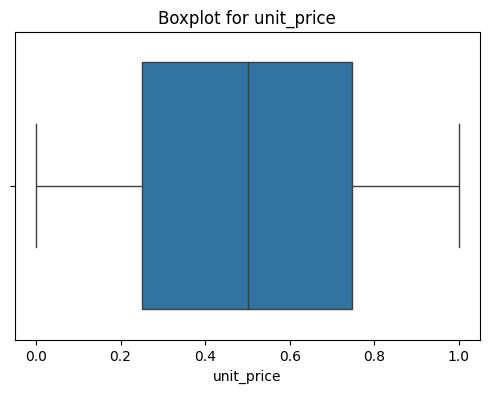

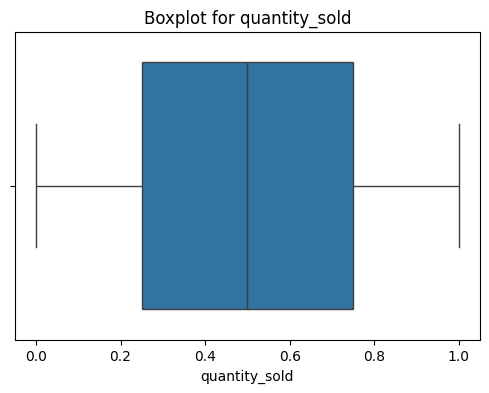

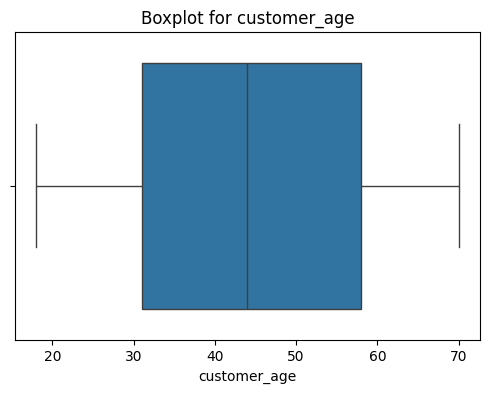

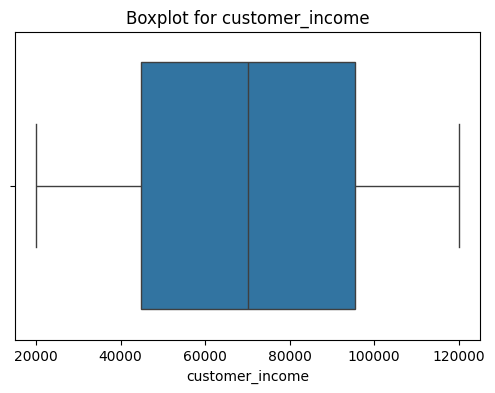

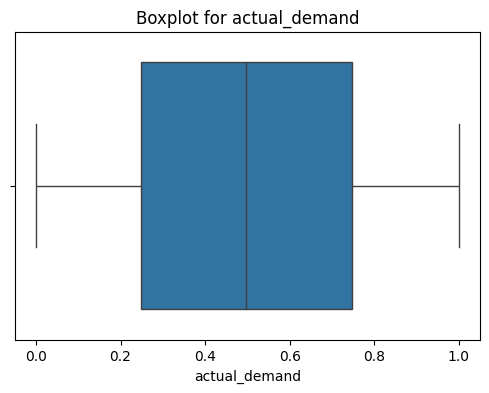

In [17]:
outlier_columns = ['unit_price', 'quantity_sold', 'customer_age', 'customer_income', 'actual_demand']
import matplotlib.pyplot as plt
import seaborn as sns

for col in outlier_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Save the cleaned data

In [18]:

cleaned_file_path = "Walmart_Cleaned_Advanced3_modified.csv"
df.to_csv(cleaned_file_path, index=False)
